<a href="https://colab.research.google.com/github/syedasonianaz/Data_Science_Bootcamp/blob/main/Student_data_EDA/EDA_student_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
#loading dataset
df = pd.read_csv("/content/student_data.csv")

# **Perform EDA**

Attributes for student_data

* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)¶
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)¶
* health - current health status (numeric: from 1 - very bad to 5 - very good)¶
* absences - number of school absences (numeric: from 0 to 93) these grades are related with the course subject, Portuguese:
* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

In [4]:
#since our dataset have many columns and we need to have proper look at how our dataset looks, so we used max display function
pd.set_option('display.max_columns', None)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [6]:
# checking shape of our dataset
df.shape

(395, 33)

## Our dataset have many columns but its size is small not even 500 rows.

In [7]:
# using info function to check types of columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Dataset doesn't have any null values and it has many categorical columns that need to be encoded later

In [8]:
# checking if dataset have any duplicate values
num_duplicate_rows = df.duplicated().sum()
num_duplicate_rows

0

## Since dataset doesn't have any null or duplicate values so we will now check distribution of all columns

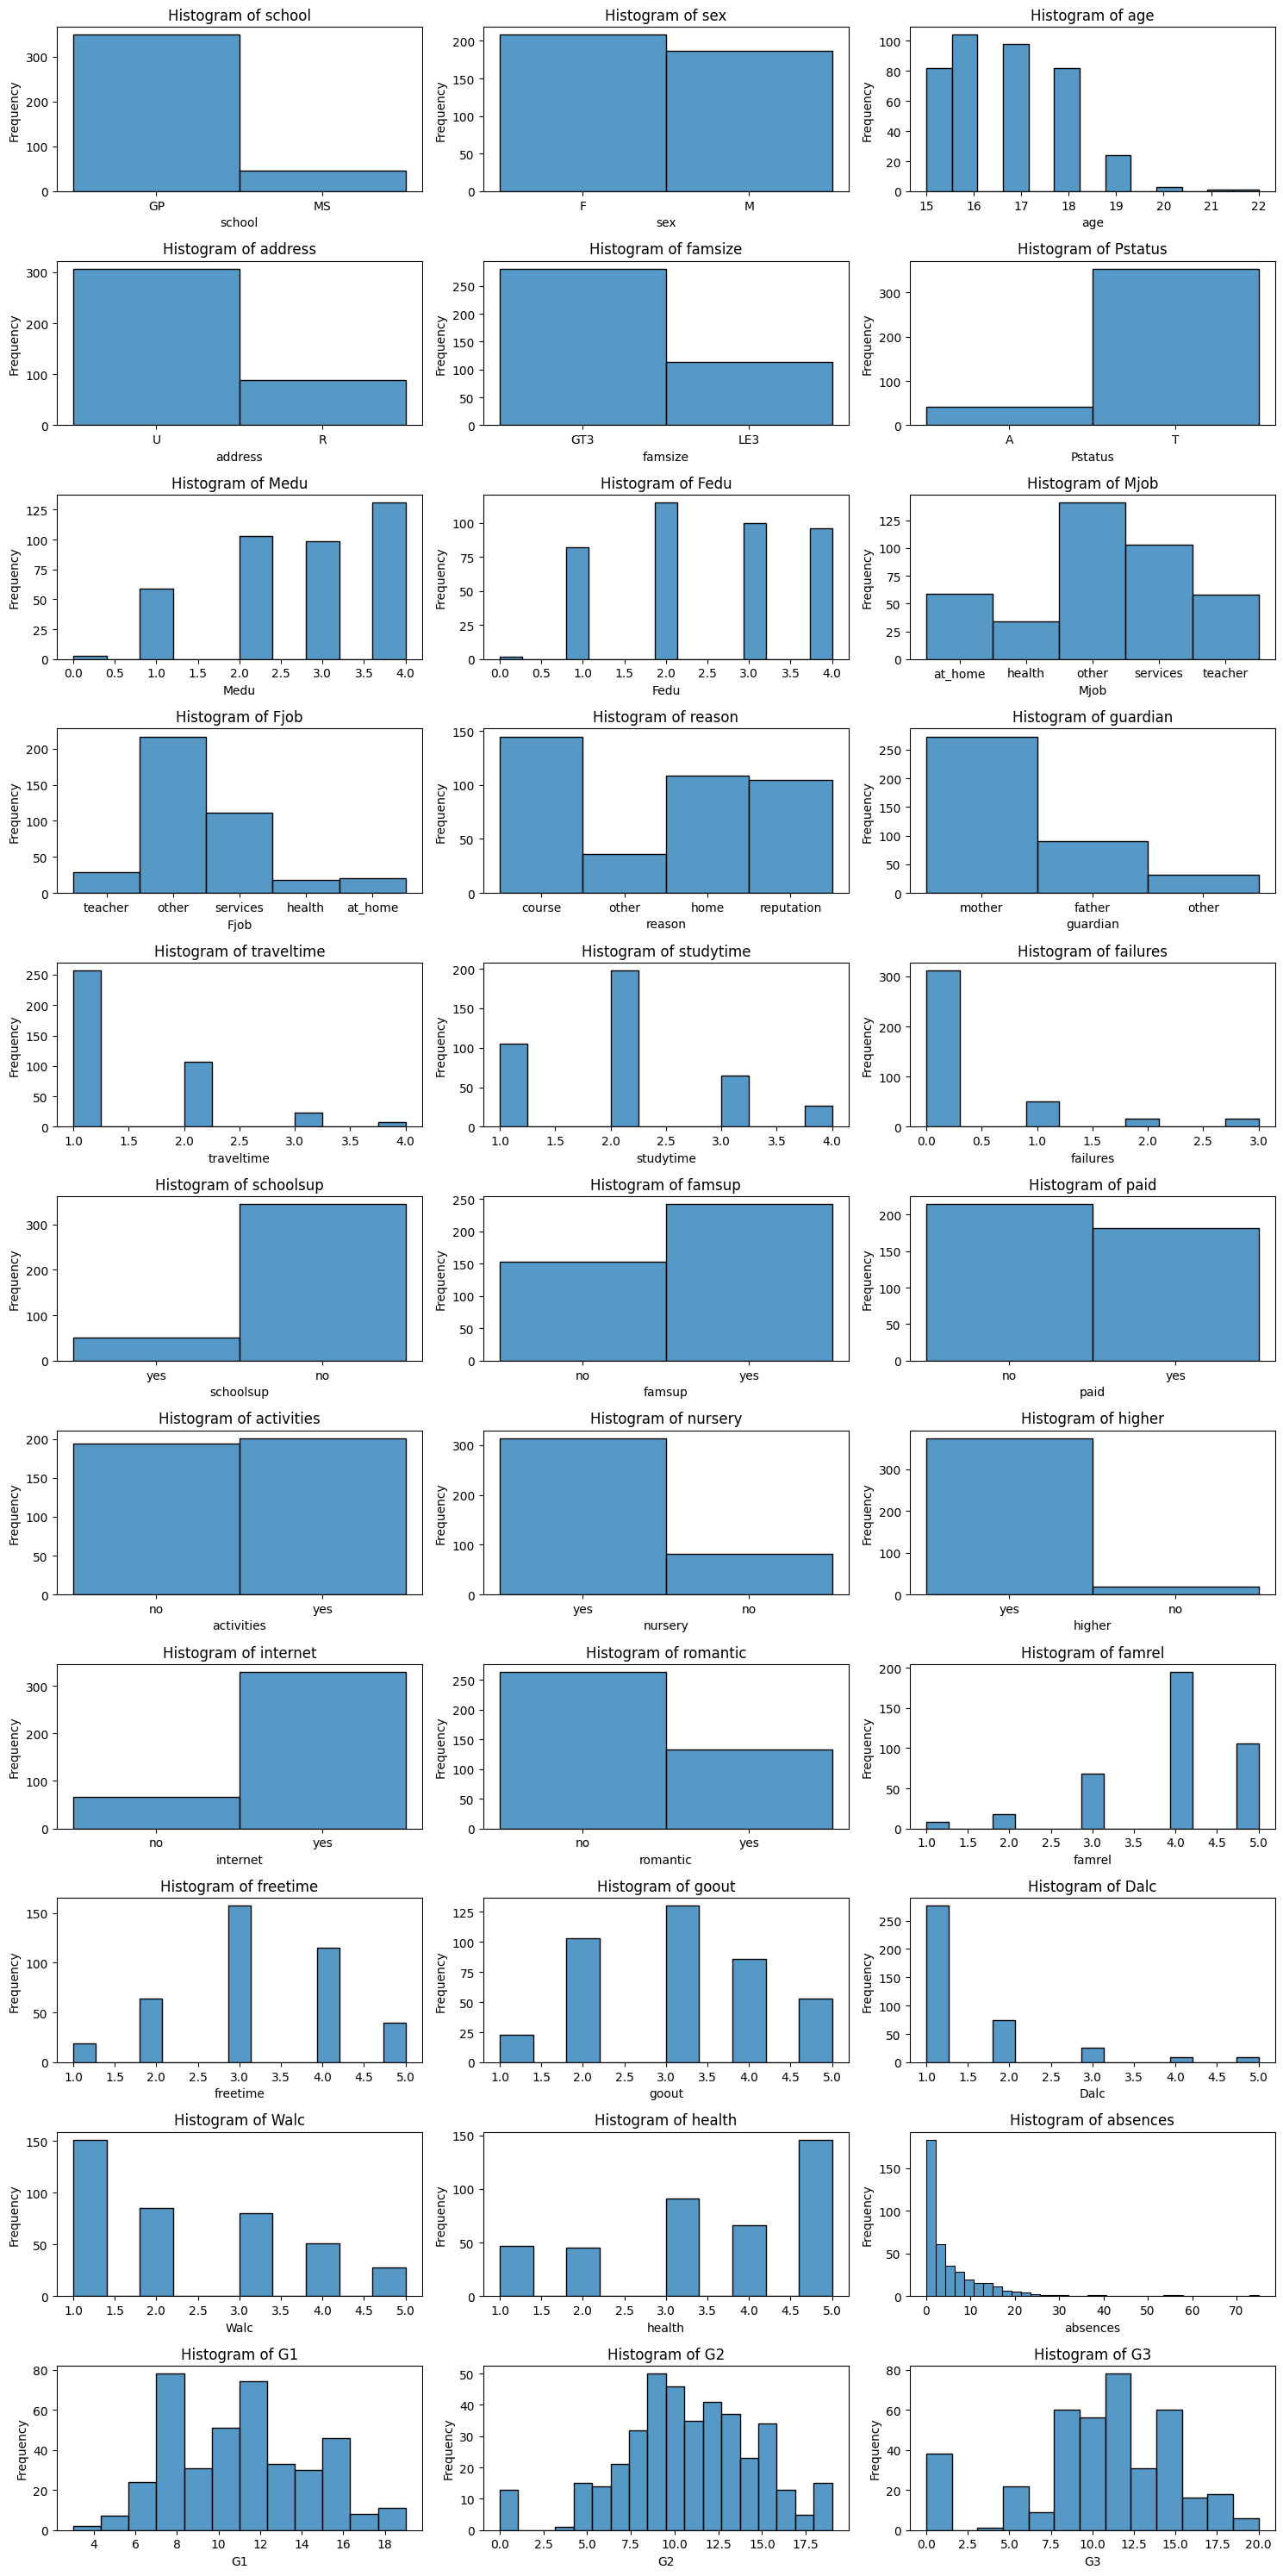

In [14]:
# Get all columns
columns = df.columns

# Set the figure size
plt.figure(figsize=(15, 30))

# Loop through each column and plot the histogram
for i, col in enumerate(columns):
    plt.subplot(11, 3, i + 1)  # Subplot arrangement with 11 rows and 3 columns for better visualization
    sns.histplot(df[col])
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.tight_layout()

# Show the plot
plt.show()

## Most of the numerical columns are skewed and categorical have binary values that are imbalance as well

In [15]:
#Finding unique values in columns
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

## Checking percentage of unique values

In [16]:
# Iterate through all columns
for column in df.columns:
    # Get the value counts for the current column
    value_counts = df[column].value_counts()

    # Calculate the percentages
    percentages = (value_counts / len(df[column])) * 100

    # Create a DataFrame with the unique values, counts, and percentages
    result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values, 'Percentage': percentages.values})

    # Display the results for the current column
    print(f"\nUnique values and percentages for '{column}':")
    print(result_df)


Unique values and percentages for 'school':
  Value  Count  Percentage
0    GP    349    88.35443
1    MS     46    11.64557

Unique values and percentages for 'sex':
  Value  Count  Percentage
0     F    208   52.658228
1     M    187   47.341772

Unique values and percentages for 'age':
   Value  Count  Percentage
0     16    104   26.329114
1     17     98   24.810127
2     18     82   20.759494
3     15     82   20.759494
4     19     24    6.075949
5     20      3    0.759494
6     22      1    0.253165
7     21      1    0.253165

Unique values and percentages for 'address':
  Value  Count  Percentage
0     U    307   77.721519
1     R     88   22.278481

Unique values and percentages for 'famsize':
  Value  Count  Percentage
0   GT3    281   71.139241
1   LE3    114   28.860759

Unique values and percentages for 'Pstatus':
  Value  Count  Percentage
0     T    354   89.620253
1     A     41   10.379747

Unique values and percentages for 'Medu':
   Value  Count  Percentage
0    

## Only absence and grades column have many unique values

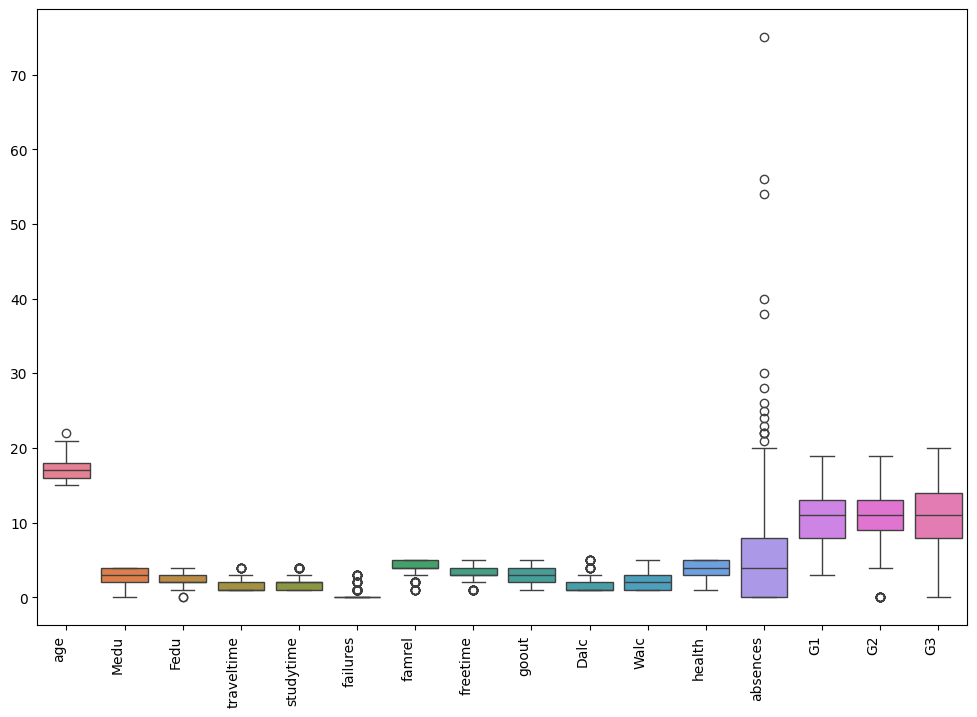

In [17]:
#Finding outliers using boxplot
plt.subplots(figsize=(12, 8))
sns.boxplot(data=df, orient='v')
plt.xticks(rotation=90, ha='right')
plt.show()

## Absence column have higest unique value count and outliers as well. We will first fix this column and check how many outliers other columns have

In [19]:
# Finding min, max and mean values to understand how numerical values are distributed
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## 75 absences are quite a lot will find how many students have more than 50 absences

In [20]:
# Finding rows that have higher than 50 absences
specific_row = df[df['absences'] >= 50]
specific_row

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
74,GP,F,16,U,GT3,T,3,3,other,services,home,mother,1,2,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,3,2,4,5,54,11,12,11
183,GP,F,17,U,LE3,T,3,3,other,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,3,3,2,3,1,56,9,9,8
276,GP,F,18,R,GT3,A,3,2,other,services,home,mother,2,2,0,no,no,no,no,no,no,yes,yes,4,1,1,1,1,5,75,10,9,9


## Only 3 have higher than 50 absences now will check how many have higher than 25%

In [21]:
# Finding rows that have higher than 25 absences
specific_row = df[df['absences'] >= 25]
specific_row

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,GP,F,16,U,LE3,T,2,2,other,other,home,mother,2,2,1,no,yes,no,yes,no,yes,yes,yes,3,3,3,1,2,3,25,7,10,11
74,GP,F,16,U,GT3,T,3,3,other,services,home,mother,1,2,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,3,2,4,5,54,11,12,11
103,GP,F,15,U,GT3,T,3,2,services,other,home,mother,2,2,0,yes,yes,yes,no,yes,yes,yes,no,4,3,5,1,1,2,26,7,6,6
183,GP,F,17,U,LE3,T,3,3,other,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,3,3,2,3,1,56,9,9,8
205,GP,F,17,U,GT3,T,3,4,at_home,services,home,mother,1,3,1,no,yes,yes,no,yes,yes,yes,yes,4,4,3,3,4,5,28,10,9,9
276,GP,F,18,R,GT3,A,3,2,other,services,home,mother,2,2,0,no,no,no,no,no,no,yes,yes,4,1,1,1,1,5,75,10,9,9
280,GP,M,17,U,LE3,A,4,1,services,other,home,mother,2,1,0,no,no,yes,yes,yes,yes,yes,yes,4,5,4,2,4,5,30,8,8,8
307,GP,M,19,U,GT3,T,4,4,teacher,services,reputation,other,2,1,1,no,yes,yes,no,yes,yes,yes,yes,4,3,4,1,1,4,38,8,9,8
315,GP,F,19,R,GT3,T,2,3,other,other,reputation,other,1,3,1,no,no,no,no,yes,yes,yes,yes,4,1,2,1,1,3,40,13,11,11


In [28]:
# Removing rows that have absence about 50
df = df[df['absences'] <= 50]
df.shape

(392, 33)

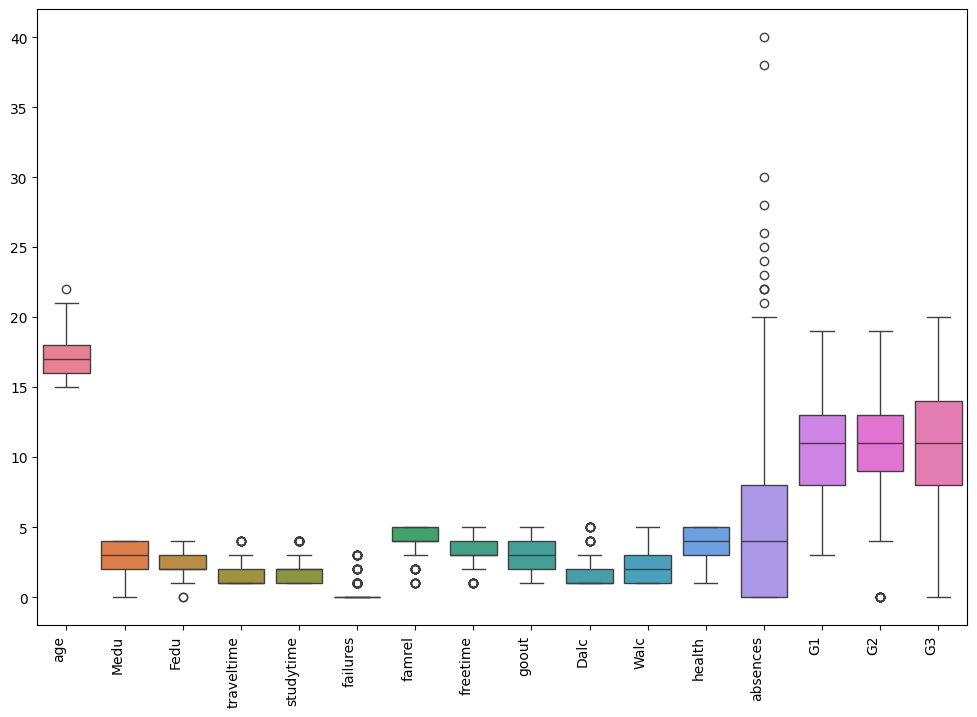

In [29]:
plt.subplots(figsize=(12, 8))
sns.boxplot(data=df, orient='v')
plt.xticks(rotation=90, ha='right')
plt.show()

## Since dataset is small we won't use IQR to remove outliers. Absence seems to have 2 points faraway from rest but will leave them as it is.

<ipython-input-31-5c5c72d3d15c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues',fmt= '.2f')


<Axes: >

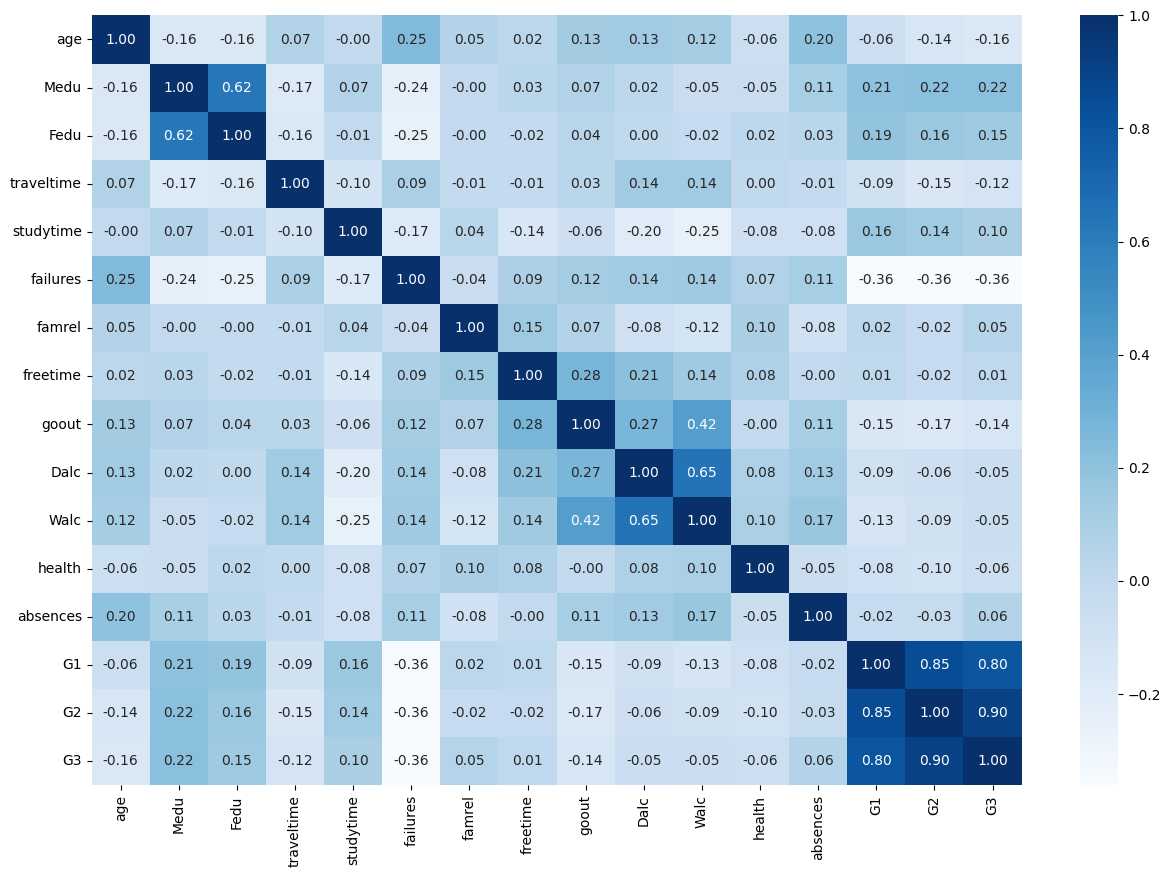

In [31]:
#Finding correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues',fmt= '.2f')


## Grades' exams have high correlation with eachother so we will perform feature engineering here and make new column that would be mean of these three columns and old ones could get deleted. Mother's and father's education are correlated as well so we will take its mean as well and lastly alcohol consumption would taken of weekly only and daily ones will get dropped.

In [32]:
correlated_features = ['G1', 'G2', 'G3']

# Calculate the mean of correlated features
df['mean_of_grades'] = df[correlated_features].mean(axis=1)

# Display the DataFrame with the new column
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,mean_of_grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.666667
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15,15.000000
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11,11.666667
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6,5.666667
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19,17.666667
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15,14.666667


In [33]:
correlated_features = ['Medu', 'Fedu']

# Calculate the mean of correlated features
df['mean_of_parents_edu'] = df[correlated_features].mean(axis=1)

# Display the DataFrame with the new column
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,mean_of_grades,mean_of_parents_edu
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.666667,4.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.333333,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,8.333333,1.0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14.666667,3.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.666667,3.0
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15,15.000000,3.5
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11,11.666667,2.0
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6,5.666667,4.0
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19,17.666667,2.5
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15,14.666667,3.5


In [34]:
# Instead of drop one by one grouping them
correlated_features_to_drop = ['G1', 'G2', 'G3','Medu','Fedu','Dalc']

# Droping correlated features
df = df.drop(correlated_features_to_drop, axis=1)

# Display the DataFrame after dropping the correlated features
df

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Walc,health,absences,mean_of_grades,mean_of_parents_edu
0,GP,F,18,U,GT3,A,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,3,6,5.666667,4.0
1,GP,F,17,U,GT3,T,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,3,4,5.333333,1.0
2,GP,F,15,U,LE3,T,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,3,3,10,8.333333,1.0
3,GP,F,15,U,GT3,T,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,5,2,14.666667,3.0
4,GP,F,16,U,GT3,T,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,2,5,4,8.666667,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,5,4,11,9.000000,2.0
391,MS,M,17,U,LE3,T,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,4,2,3,15.333333,2.0
392,MS,M,21,R,GT3,T,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,8.333333,1.0
393,MS,M,18,R,LE3,T,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,4,5,0,11.000000,2.5


In [75]:
#splitting dataset into train and test
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [83]:
# Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in X:
  if X[column].dtype == object:
    X[column] = le.fit_transform(X[column])


In [84]:
# Transforming the column
le = LabelEncoder()
y = le.fit_transform(y)

In [85]:
# Creating model for Random Forest for checking features importance
rf = RandomForestClassifier()

In [86]:
# Training the model
rf.fit(X,y)

RandomForestClassifier()

In [88]:
# Checking Importance of features
rf.feature_importances_

array([0.01261382, 0.02303939, 0.05328101, 0.01714669, 0.02166123,
       0.01189531, 0.07422922, 0.0645666 , 0.04248827, 0.02860856,
       0.03105273, 0.04555101, 0.02424533, 0.01350642, 0.02436707,
       0.02271611, 0.02409866, 0.01930951, 0.00711443, 0.01425576,
       0.02110595, 0.0426817 , 0.04806706, 0.04746511, 0.04860933,
       0.05042043, 0.06915615, 0.09674714])

<Axes: >

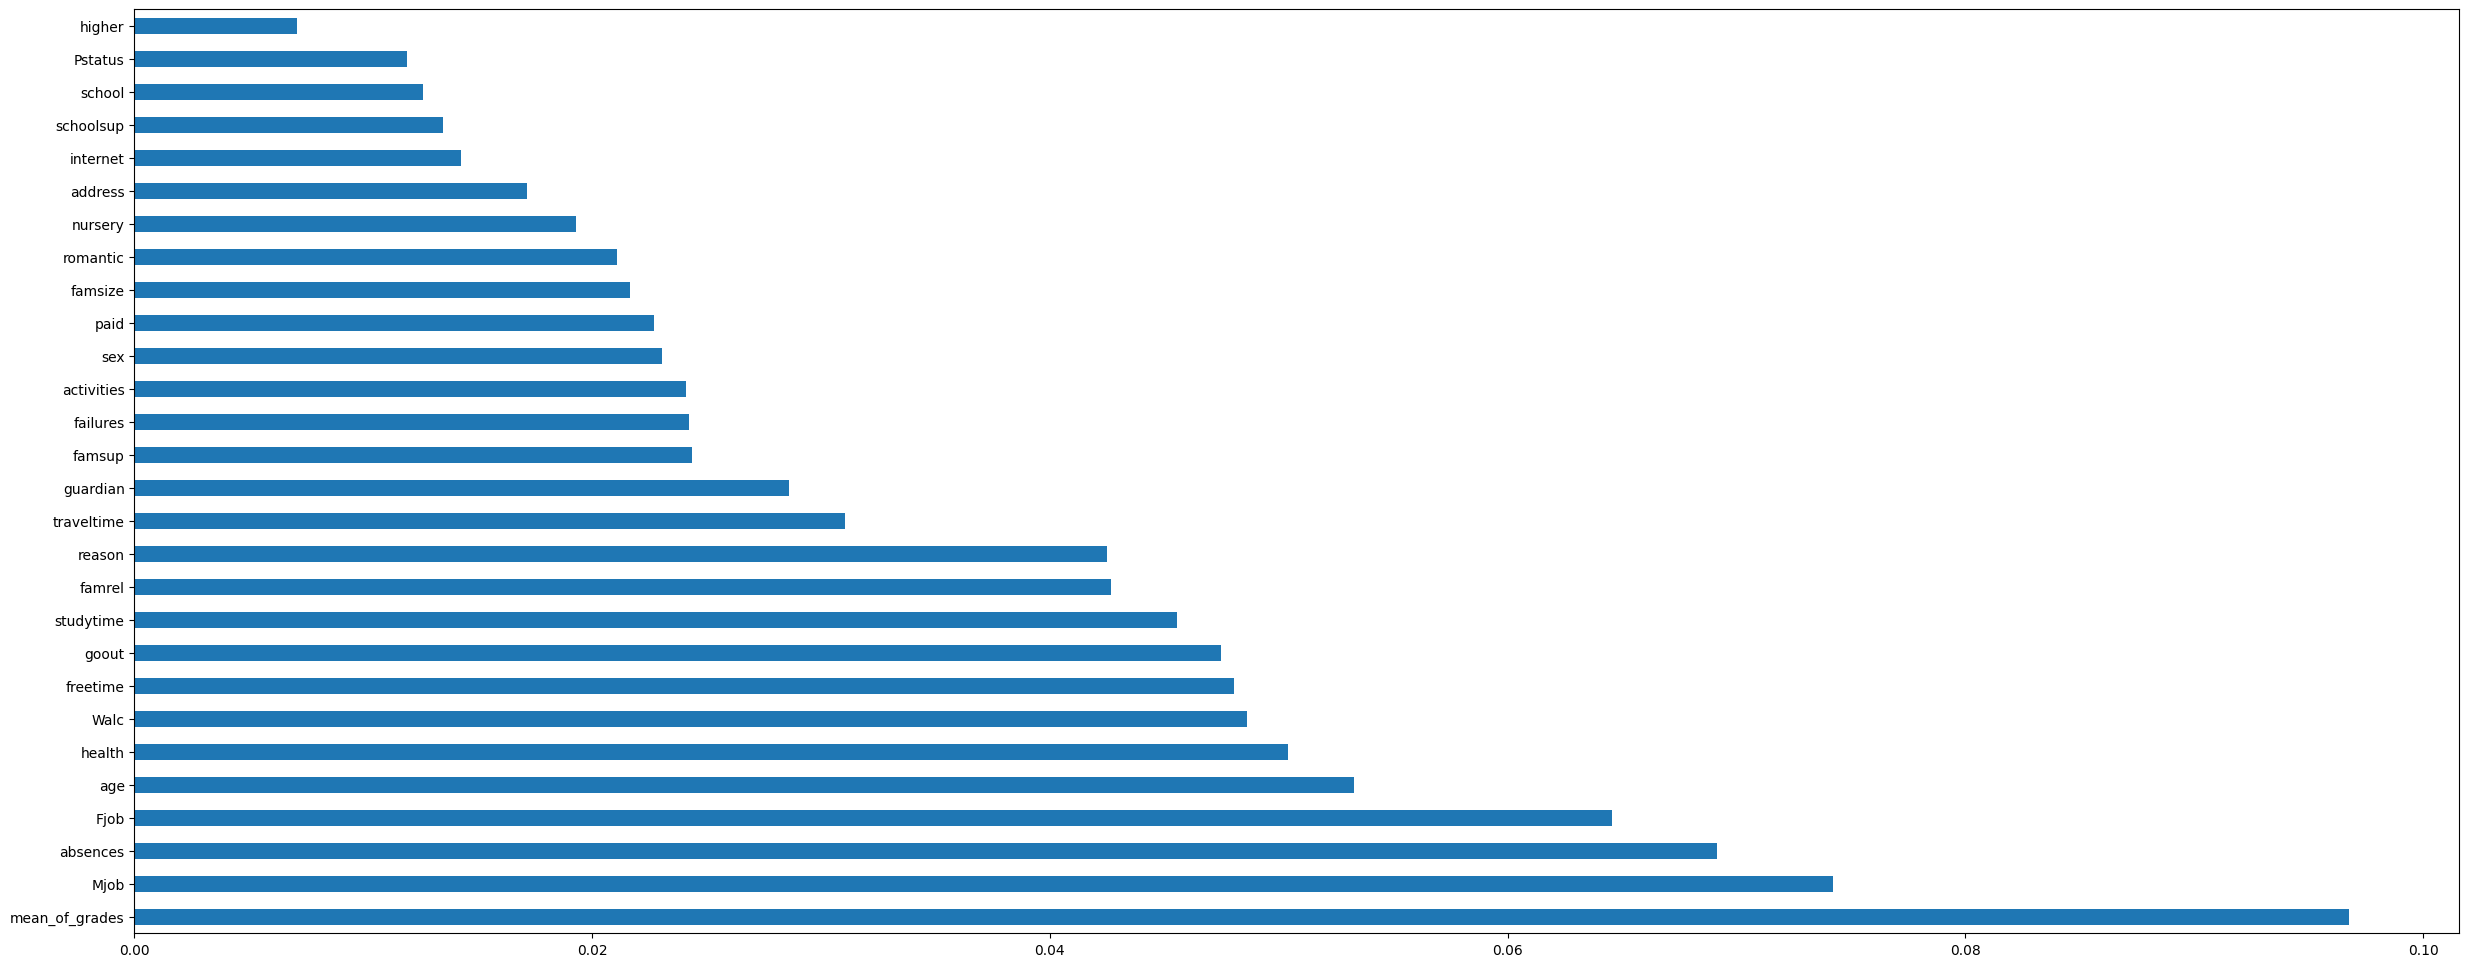

In [89]:
# Plot for better understanding of importance
rf_feature = pd.Series(rf.feature_importances_, index=X.columns)
rf_feature.nlargest(30).plot(kind='barh')

In [90]:
# Selecting important features
df_new = df[['mean_of_grades', 'Mjob', 'Fjob', 'studytime','absences', 'famrel','reason','Walc','goout','freetime','health','age', 'traveltime', 'guardian']]
# Printing new dataset
df_new

,mean_of_grades,Mjob,Fjob,studytime,absences,famrel,reason,Walc,goout,freetime,health,age,traveltime,guardian
0,5.666667,at_home,teacher,2,6,4,course,1,4,3,3,18,2,mother
1,5.333333,at_home,other,2,4,5,course,1,3,3,3,17,1,father
2,8.333333,at_home,other,2,10,4,other,3,2,3,3,15,1,mother
3,14.666667,health,services,3,2,3,home,1,2,2,5,15,1,mother
4,8.666667,other,other,2,4,4,home,2,2,3,5,16,1,father
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,9.000000,services,services,2,11,5,course,5,4,5,4,20,1,other
391,15.333333,services,services,1,3,2,course,4,5,4,2,17,2,mother
392,8.333333,other,other,1,3,5,course,3,3,5,3,21,1,other
393,11.000000,services,other,1,0,4,course,4,1,4,5,18,3,mother
